In [1]:
import numpy as np
import seaborn
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

### Create 2-dimensional latent field

In [2]:
n = 10
m = 10

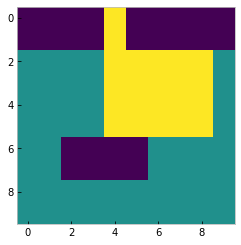

In [3]:
latent_2d = np.ones((n,m), dtype="int64")
latent_2d[2:6, 4:9] = 2
latent_2d[6:8, 2:6] = 0
latent_2d[0:2, 0:10] = 0
latent_2d[0:2, 4:5] = 2

plt.imshow(latent_2d)
plt.grid(False)

### Sample

In [4]:
f = 4
c1 = scipy.stats.multivariate_normal([7, 7, 11, 3], np.eye(f) * 0.35)
c2 = scipy.stats.multivariate_normal([8, 8, 10, 2], np.eye(f) * 0.55)
c3 = scipy.stats.multivariate_normal([9, 9, 9, 1], np.eye(f) * 0.15)

In [5]:
obs = np.zeros((n,m,f))
np.shape(obs)

(10, 10, 4)

In [6]:
for i, x in enumerate(latent_2d[:,0]):
    for j, y in enumerate(latent_2d[0,:]):
        # generate a 2-d random vector at each point
        if latent_2d[i, j] == 0:
            obs[i,j,:] = c1.rvs()
        elif latent_2d[i, j] == 1:
            obs[i,j,:] = c2.rvs()
        elif latent_2d[i, j] == 2:
            obs[i,j,:] = c3.rvs()

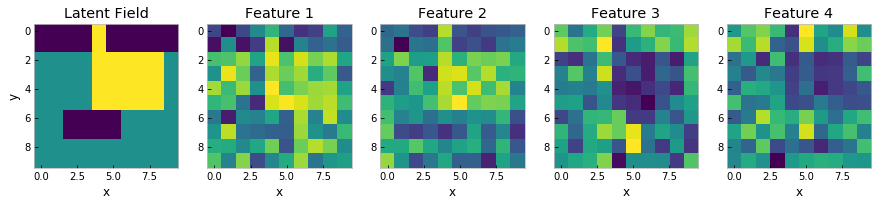

In [7]:
fig, ax = plt.subplots(ncols=5, figsize=(15,7))
for i in range(f+1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest")
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(obs[:,:,i-1], interpolation="nearest")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")
    

### Collapse into feature vector

In [8]:
feature_vector = np.array([obs[:,:,0].flatten(),obs[:,:,1].flatten(),obs[:,:,2].flatten(),obs[:,:,3].flatten()]).T
np.shape(feature_vector)

(100, 4)

### Create coords vector

In [9]:
x,y = np.indices(np.shape(latent_2d))
xf = x.flatten()
yf = y.flatten()

coords_vector = np.array([xf, yf]).T
np.shape(coords_vector)

(100, 2)

### BaySeg initialization

In [10]:
clf = bayseg.BaySeg(obs, 3)

In [19]:
clf.colors

array([[[0, 0],
        [0, 2],
        [0, 4],
        [0, 6],
        [0, 8],
        [2, 0],
        [2, 2],
        [2, 4],
        [2, 6],
        [2, 8],
        [4, 0],
        [4, 2],
        [4, 4],
        [4, 6],
        [4, 8],
        [6, 0],
        [6, 2],
        [6, 4],
        [6, 6],
        [6, 8],
        [8, 0],
        [8, 2],
        [8, 4],
        [8, 6],
        [8, 8]],

       [[0, 1],
        [0, 3],
        [0, 5],
        [0, 7],
        [0, 9],
        [2, 1],
        [2, 3],
        [2, 5],
        [2, 7],
        [2, 9],
        [4, 1],
        [4, 3],
        [4, 5],
        [4, 7],
        [4, 9],
        [6, 1],
        [6, 3],
        [6, 5],
        [6, 7],
        [6, 9],
        [8, 1],
        [8, 3],
        [8, 5],
        [8, 7],
        [8, 9]],

       [[1, 0],
        [1, 2],
        [1, 4],
        [1, 6],
        [1, 8],
        [3, 0],
        [3, 2],
        [3, 4],
        [3, 6],
        [3, 8],
        [5, 0],
        [5, 2],
    

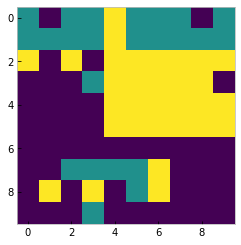

In [14]:
plt.imshow(clf.labels[-1].reshape(10,10))
plt.grid(False)

### Pseudocoloring in 2D with 4-stamp

In [15]:
e = 10

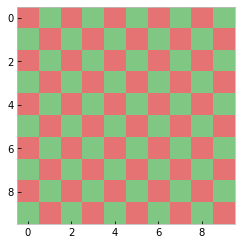

In [16]:
plt.imshow(np.tile(np.kron([[0, 1], [1, 0]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

### Pseudocoloring in 2D with 8-stamp

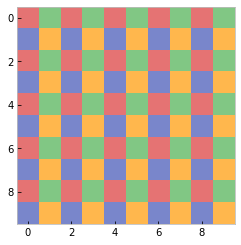

In [17]:
plt.imshow(np.tile(np.kron([[0, 1], [2, 3]] * int(e/2), np.ones((1, 1))), int(e/2)), cmap=bayseg.cmap, norm=bayseg.cmap_norm)
plt.grid(False)

In [18]:
np.shape(clf.colors)

(4, 25, 2)